<a href="https://colab.research.google.com/github/MuhammadMuneebFida/Resnet-18-and-vgg-16-on-COVID-19-dataset/blob/master/vgg_and_resnet_python_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VGG Task 1

In [1]:
from google.colab import drive
drive.mount('./gdrive')


Drive already mounted at ./gdrive; to attempt to forcibly remount, call drive.mount("./gdrive", force_remount=True).


In [2]:
!unzip "./gdrive/My Drive/Copy of A_05_Part_02_Dataset.zip"

Archive:  ./gdrive/My Drive/Copy of A_05_Part_02_Dataset.zip
replace A_05_Part_02_Dataset/Test/0.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
trainPath='/content/A_05_Part_02_Dataset/Train'
validPath='/content/A_05_Part_02_Dataset/Validation'
# testPath='/content/Copy of A_05_Part_02_Dataset/test'

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
from sklearn.metrics import accuracy_score

In [5]:
# from sklearn.metrics import accuracy_score
#Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.Resize((224,224)),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor()])

valid_transforms = transforms.Compose([transforms.Resize((224,224)),

                                      transforms.ToTensor()])


test_transforms = transforms.Compose([transforms.Resize((224,224)),

                                      transforms.ToTensor()])
#pass transform here-in
train_data = torchvision.datasets.ImageFolder(trainPath , transform=train_transforms)
valid_data=torchvision.datasets.ImageFolder(validPath , transform=train_transforms)
# test_data = datasets.ImageFolder(testPath, transform=test_transforms)

#data loaders
trainloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True,num_workers=4)
validloader=torch.utils.data.DataLoader(valid_data, batch_size=32, shuffle=True,num_workers=4)
# testloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=True,num_workers=4)

print("Classes: ")
class_names = train_data.classes
print(class_names)

Classes: 
['covid-19', 'normal', 'pneumonia']


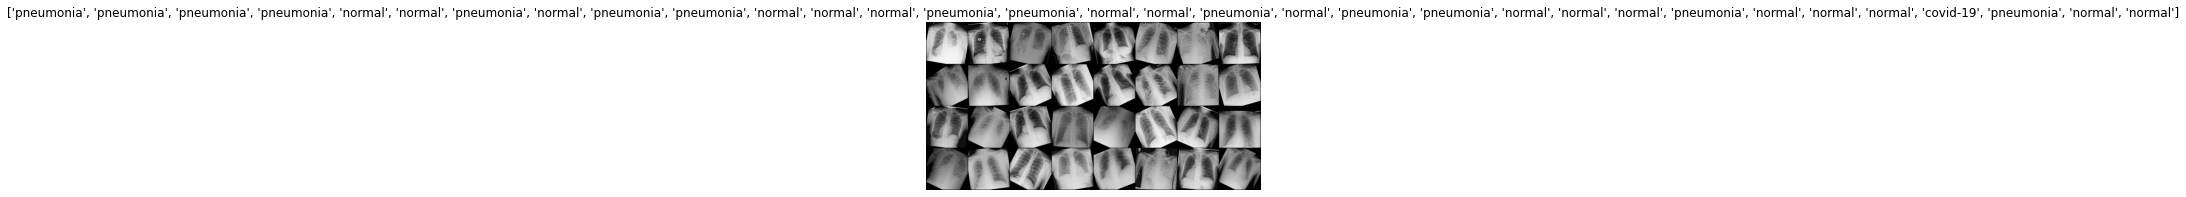

In [6]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    plt.axis('off')
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

def show_databatch(inputs, classes):
    out = torchvision.utils.make_grid(inputs)
    imshow(out, title=[class_names[x] for x in classes])

# Get a batch of training data
inputs, labels = next(iter(trainloader))

show_databatch(inputs, labels)

In [0]:
def encoder(labels):
  zTemp=torch.zeros(32,3)  
  for i in range(len(labels)):
        if labels[i] == 0:
            zTemp[i] = torch.tensor([1,1,0])
        elif labels[i] == 2:
            zTemp[i] = torch.tensor([0,1,0])
        elif labels[i] == 1:
            zTemp[i] = torch.tensor([0,0,1])
  return zTemp

In [8]:
# # Get a batch of training data
# inputs, classes = next(iter(trainloader))
# show_databatch(inputs, classes)# Load the pretrained model from pytorch

vgg16 = models.vgg16(pretrained=False)
print(vgg16)
print('Output Layer of VGG16 : ', vgg16.classifier[6].out_features) # 1000 

# num_features = vgg16.classifier[6].in_features
# features = list(vgg16.classifier.children())[:] 

# vgg16.classifier[6].out_features = 1010

features=([nn.Linear(25088,1010),nn.ReLU(inplace=True),nn.Linear(1010, 3)])

print(features)

# Freeze training for all layers
for param in vgg16.features.parameters():
    param.requires_grad = True


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [0]:
# vgg16.classifier = nn.Sequential(*features)
# print(vgg16)

In [10]:
vgg16.classifier = nn.Sequential(*features)
print(vgg16)
Epochs = 10
criterion = nn.BCEWithLogitsLoss()
# optimizer = optim.SGD(vgg16.parameters(), lr=0.0001, momentum=0.45)
optimizer = optim.SGD(vgg16.parameters(), lr=0.001, momentum=0.49)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [0]:
def validLos(loader):
   total=0.0
   correct=0.0
   running_loss=0.0   
   losss=[]
   pbar = tqdm(enumerate(loader))
   for i, data in pbar:
      # get the inputs
      inputs, labels = data 

      # labels= enc.transform(labels.numpy().reshape(-1,1)).toarray()
      # labels = torch.from_numpy(labels)
      hot_labels = encoder(labels)

      inputs, hot_labels = inputs.to(device), hot_labels.to(device)

      # forward + backward + optimize
      outputs = vgg16(inputs)               #----> forward pass
      labels=labels.unsqueeze(1)

      loss = criterion(outputs, hot_labels)   #----> compute loss
      losss.append(loss.item())
      
      
      outputs=torch.sigmoid(outputs)
      # print(outputs)

      outputs[outputs < 0.4] = 0
      outputs[outputs >= 0.4] = 1

      total += hot_labels.size(0)
      correct += (outputs == hot_labels).sum().item()
      

      # _,pred=torch.max(outputs.data,dim=1)        
  
          # print statistics
      running_loss += loss.item()
      pbar.set_description(
          'Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
              epoch, i * len(inputs), len(loader.dataset),
              100. * i / len(loader),
              loss.item()))         
      
   accuracy=correct*100/total
   return losss,len(data),accuracy

In [0]:
# def encoder(label):
#   # x = np.squeeze(np.eye(num_classes)[a.reshape(-1)])
#   for i in range(len(label)):
#         if label[i] == 0:
#             label[i] = torch.tensor([1,1,0])
#         elif label[i] == 1:
#             label[i] = torch.tensor([0,1,0])
#         elif label[i] == 2:
#             label[i] = torch.tensor([0,0,1])
#   return label

In [17]:
from tqdm import tqdm

#if you have gpu then you need to convert the network and data to cuda
#the easiest way is to first check for device and then convert network and data to device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
vgg16.to(device)
meanTrain=[]
meanValid=[]
meanVerror=[]
meanTerror=[]
losssssList=[]
total=0.0
correct=0.0
targets=[]
all_pred=[]
    
for epoch in range(Epochs):  # loop over the dataset multiple times
  vgg16.train()
  acc=[]
  temp=[]
  running_loss = 0.0
  l=0
  lebelsTemp=[]



  pbar = tqdm(enumerate(trainloader))
  for i, data in pbar:
      # get the inputs
      inputs, labels = data
      # print(labels.size())
      # labels= enc.transform(labels.numpy().reshape(-1,1)).toarray()
      # labels = torch.from_numpy(labels)
      
      hot_labels = encoder(labels)
      
      # print("HOT LABELS:",hot_labels)
      inputs, hot_labels = inputs.to(device), hot_labels.to(device)
      # print(hot_labels,"Hot lebels")
      # forward + backward + optimize
      outputs = vgg16(inputs)  
      

      # hot_labels=torch.max(hot_labels)

      # outputs=torch.max(outputs)
      # print(outputs.size(),"Output size")
      # print(hot_labels.size(),"labels size")
      loss = criterion(outputs, hot_labels)   #----> compute loss
      loss.backward()                     #----> backward pass
      optimizer.step()                    #----> weights update
      
      # outputs=torch.sigmoid(outputs)

      outputs[outputs >= 0.5] = 1
      outputs[outputs < 0.5] = 0
      
      # print(outputs,"outputs")
      total += hot_labels.size(0)
      
      correct += (outputs == hot_labels).sum().item()
      # print(correct,"Correct")

      losssssList.append(loss.item())

      pbar.set_description(
          'Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
              epoch, i * len(inputs), len(trainloader.dataset),
              100. * i / len(trainloader),
              loss.item()))


  vgg16.eval()

  accuracy = (100 * correct / total)
  # print(hot_labels,"Label")
  # print(outputs,"Output")
        
  targets+=list(hot_labels.view(-1).cpu().numpy())
  all_pred+=(list(outputs.view(-1).cpu().detach().numpy()))
  
  epoch_loss_train=np.mean(np.asarray(losssssList))#running_loss/len(data)
  meanTerror.append(epoch_loss_train)

  # print("Per epoch training accuracy and Loss:", accuracy,epoch_loss_train)
 
  meanTrain.append(accuracy)

  los,dataLen,validAccu=validLos(validloader)
  epoch_loss = np.mean(np.asarray(los))

  meanVerror.append(epoch_loss)
  acc.append(validAccu)
  acc=np.asarray(acc)

  meanAccu=np.mean(acc)
  meanValid.append(meanAccu)
  print(meanAccu,"Mean Validation Accracy\n",accuracy/3,"Mean Train Accuracy",epoch_loss,"Epoch Validation Loss",epoch_loss_train,'Epoch train Loss')
  # torch.save(vgg16.state_dict(), 'vgg16_ft.pth')

plt.title("Loss curve")
plt.plot(range(Epochs), meanTerror)
plt.plot(range(Epochs), meanVerror)
plt.show()

plt.title("Accuracy Curve")
plt.plot(range(Epochs), meanTrain)
plt.plot(range(Epochs), meanValid)
plt.show()


print('Finished Training')





0it [00:00, ?it/s]



Train Epoch: 0 [0/6200 (0%)]	Loss: 0.487521: : 0it [00:02, ?it/s]



Train Epoch: 0 [0/6200 (0%)]	Loss: 0.487521: : 1it [00:02,  2.06s/it]



Train Epoch: 0 [32/6200 (1%)]	Loss: 0.474172: : 1it [00:02,  2.06s/it]



Train Epoch: 0 [32/6200 (1%)]	Loss: 0.474172: : 2it [00:02,  1.70s/it]



Train Epoch: 0 [64/6200 (1%)]	Loss: 0.393938: : 2it [00:03,  1.70s/it]



Train Epoch: 0 [64/6200 (1%)]	Loss: 0.393938: : 3it [00:03,  1.45s/it]



Train Epoch: 0 [96/6200 (2%)]	Loss: 0.422039: : 3it [00:04,  1.45s/it]



Train Epoch: 0 [96/6200 (2%)]	Loss: 0.422039: : 4it [00:04,  1.27s/it]



Train Epoch: 0 [128/6200 (2%)]	Loss: 0.408153: : 4it [00:05,  1.27s/it]



Train Epoch: 0 [128/6200 (2%)]	Loss: 0.408153: : 5it [00:05,  1.15s/it]



Train Epoch: 0 [160/6200 (3%)]	Loss: 0.408138: : 5it [00:06,  1.15s/it]



Train Epoch: 0 [160/6200 (3%)]	Loss: 0.408138: : 6it [00:06,  1.06s/it]



Train Epoch: 0 [192/6200 (3%)]	Loss: 0.547777: : 6it [00:07,  1.06s/it]



Train Epoch: 

ValueError: ignored

In [0]:
def confusionMatrix(targets,all_pred):
  cm=confusion_matrix(y_true=targets,y_pred=all_pred)
  # print(cm)
  return cm


In [0]:
from sklearn.metrics import confusion_matrix
# print(type(targets))
# print(type(all_pred))
cm=confusionMatrix(targets,all_pred)
print(cm)

In [0]:
  dataiter = iter(testloader)
images, labels = dataiter.next()
show_databatch(images, labels)
images, labels = images.to(device), labels.to(device) #-->convert test image to cuda (if available)
outputs = vgg16(images)                               #--> forward pass
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % class_names[predicted[j]]
                              for j in range(len(images))))
print('Ground Truth: ', ' '.join('%5s' % class_names[labels[j]]
                              for j in range(len(images))))
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = vgg16(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))
